In [15]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

import matplotlib.pyplot as plt
import math
import csv
import numpy as np
from timeit import time

In [17]:
%%time
u=[]
z=[]
t1=np.arange(0,180.1,0.5)
t2=np.arange(0,180.1,0.5)

df = pd.DataFrame()

for i in t1:
  for j in t2:
    x = 50 * np.cos(math.radians(i)) + 40 * np.cos(math.radians(i+j))
    y = 50 * np.sin(math.radians(i)) + 40 * np.sin(math.radians(i+j))
    df = df.append({'anpha': i, 'beta': j, 'x': x, 'y': y}, ignore_index=True)
    # print(i)
    
df.to_csv('robot_2dof.csv')
df.head()


CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 32.9 µs


,anpha,beta,x,y
0,0.0,0.0,90.000000,0.000000
1,0.0,0.5,89.998477,0.349061
2,0.0,1.0,89.993908,0.698096
3,0.0,1.5,89.986293,1.047078
4,0.0,2.0,89.975633,1.395980


In [18]:
data = pd.read_csv('robot_2dof.csv')
data = data[['anpha', 'beta', 'x', 'y']]
# data.column
numpy_dataset = data.values
y = numpy_dataset[:, :2]
x = numpy_dataset[:, 2:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
#print(x_train[0])
#print(y_train[0])

In [19]:
print("Shape of data is: ", x_train.shape)
print("Shape of target is: ", y_train.shape)

Shape of data is:  (104256, 2)
Shape of target is:  (104256, 2)


In [20]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 2, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,578
Trainable params: 4,578
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
652/652 [==============================] - 6s 4ms/step - loss: 10689.5830 - acc: 0.8351 - val_loss: 10723.4443 - val_acc: 0.9426
Epoch 2/2
652/652 [==============================] - 3s 4ms/step - loss: 10685.4961 - acc: 0.9356 - val_loss: 10722.5967 - val_acc: 0.9527


In [21]:
score=model.evaluate(x_test, y_test, verbose=0)
print('Loss: ', score[0])
print('Score: ', score[1])

Loss:  10711.3173828125
Score:  0.9535775780677795


In [22]:
model.save('Robot_2dof.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


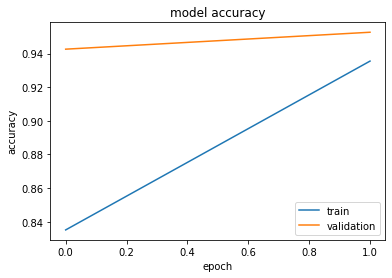

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper_left')
plt.show()

In [24]:
Px_test_train = 50
Py_test_train = 40
print(Px_test_train, Py_test_train)
test = model.predict([[Px_test_train, Py_test_train]])
t1 = test[0][0]
t2 = test[0][1]
x_1 = 50*math.cos(math.radians(t1)) + 40*math.cos(math.radians(t1+t2))
y_1 = 50*math.sin(math.radians(t1)) + 40*math.sin(math.radians(t1+t2))
print('x: ', x_1, ', y: ', y_1)
print(t1, t2)

50 40
x:  89.99390780689448 , y:  0.6981897009734661
0.00010712602 0.99989283
